In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly

init_notebook_mode(connected=True)
plotly.tools.set_credentials_file(username='JiajunChen', api_key='Cpl0ScQhftEPNBfegXBQ')
set_matplotlib_formats('retina')

In [2]:
data = pd.read_csv('./human-development/export.csv')
data.head()

,hdi rank,country,hdi,life,expected_education,mean_education,gni,gni_rank_minus_hdi_rank,continent,Country Name,population
0,1,Norway,0.944,81.6,17.5,12.6,64992,5,Europe,Norway,5188607
1,2,Australia,0.935,82.4,20.2,13.0,42261,17,Oceania,Australia,23815995
2,3,Switzerland,0.930,83.0,15.8,12.8,56431,6,Europe,Switzerland,8282396
3,4,Denmark,0.923,80.2,18.7,12.7,44025,11,Europe,Denmark,5683483
4,5,Netherlands,0.922,81.6,17.9,11.9,45435,9,Europe,Netherlands,16939923


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 11 columns):
hdi rank                   173 non-null int64
country                    173 non-null object
hdi                        173 non-null float64
life                       173 non-null float64
expected_education         173 non-null float64
mean_education             173 non-null float64
gni                        173 non-null int64
gni_rank_minus_hdi_rank    173 non-null int64
continent                  173 non-null object
Country Name               163 non-null object
population                 173 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 14.9+ KB


In [4]:
data.columns = ['hdi rank', 'country', 'hdi', 'life', 'expected_education', 'mean_education', 'gni', 'gni_rank_minus_hdi_rank', 'continent', 'Country Name', 'population']
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 11 columns):
hdi rank                   173 non-null int64
country                    173 non-null object
hdi                        173 non-null float64
life                       173 non-null float64
expected_education         173 non-null float64
mean_education             173 non-null float64
gni                        173 non-null int64
gni_rank_minus_hdi_rank    173 non-null int64
continent                  173 non-null object
Country Name               163 non-null object
population                 173 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 14.9+ KB


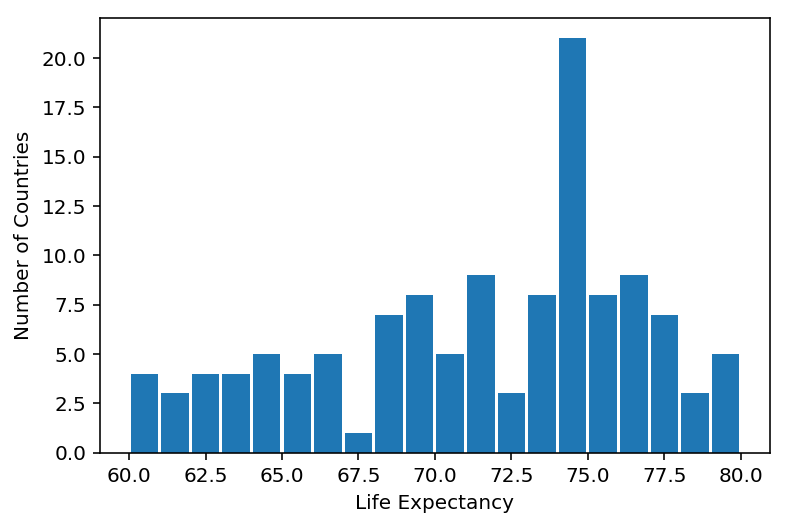

In [5]:
plt.hist(data.life, range=(60,80), bins=20, rwidth=0.9)
plt.xlabel('Life Expectancy')
plt.ylabel('Number of Countries')
plt.savefig('Life_Expectancy_Histogram.png')
plt.show()

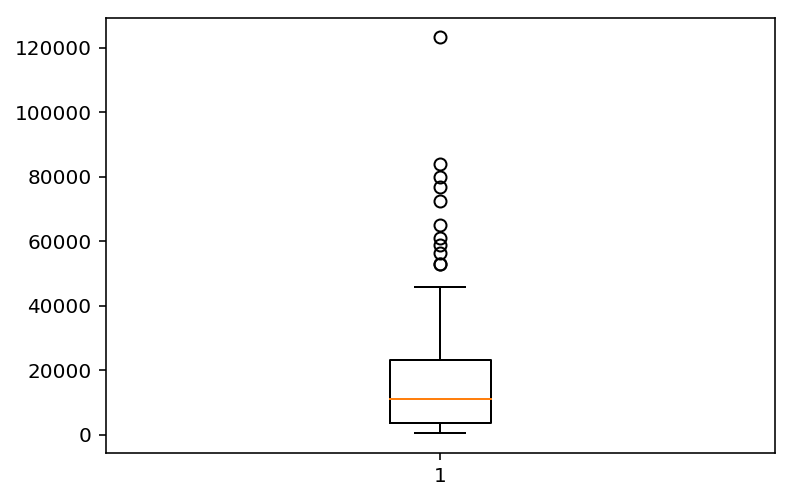

In [6]:
data['gni'] = data['gni'].astype(float)
plt.boxplot(data.gni)
plt.show()

In [7]:
data_conti = data.continent.value_counts()
data_conti

Africa      48
Asia        44
Europe      40
Americas    30
Oceania     11
Name: continent, dtype: int64

In [8]:
conti = list(data_conti.index)
conti

['Africa', 'Asia', 'Europe', 'Americas', 'Oceania']

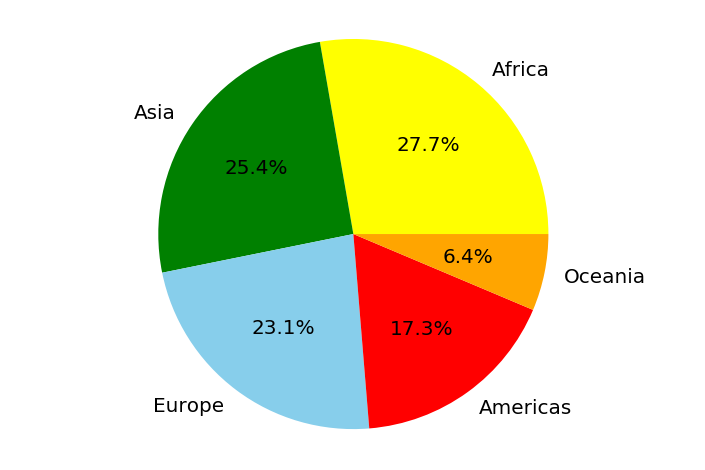

In [19]:
colors = ['yellow', 'green', 'skyblue', 'red', 'orange']
plt.pie(data_conti, labels=conti, colors=colors, autopct="%1.1f%%")
plt.axis('equal')
plt.savefig('Countries_Pie.png')
plt.show()

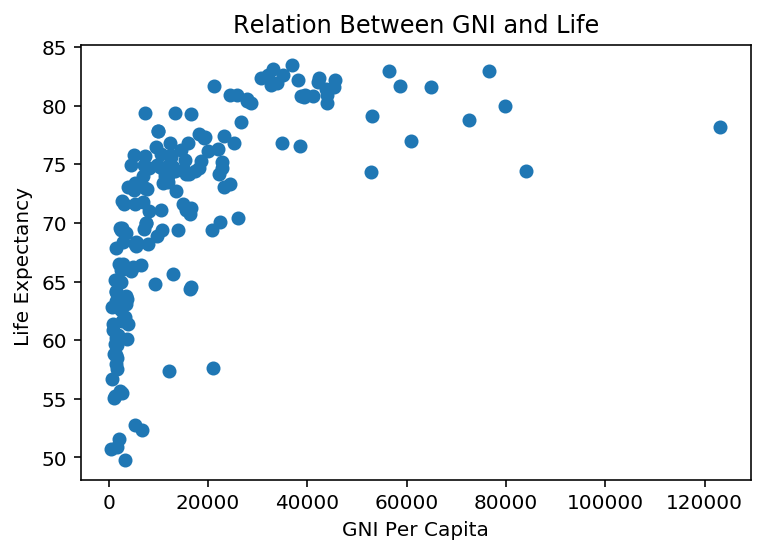

In [30]:
plt.scatter(data.gni, data.life)
plt.xlabel('GNI Per Capita')
plt.ylabel('Life Expectancy ')
plt.title('Relation Between GNI and Life')
plt.savefig('Life_GNI_Scatter.png')
plt.show()

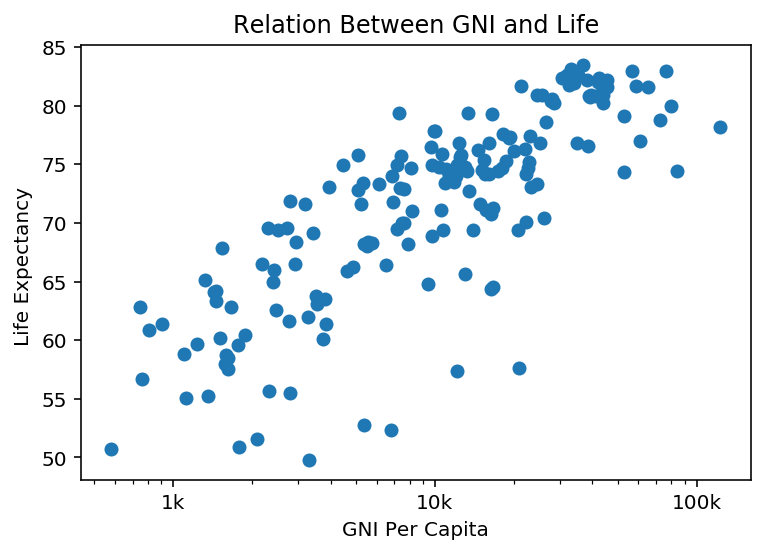

In [31]:
plt.scatter(data.gni, data.life)
plt.xscale('log')
plt.xlabel('GNI Per Capita')
plt.ylabel('Life Expectancy ')
plt.title('Relation Between GNI and Life')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.savefig('Life_GNI_Scatter_scaled.png')
plt.show()

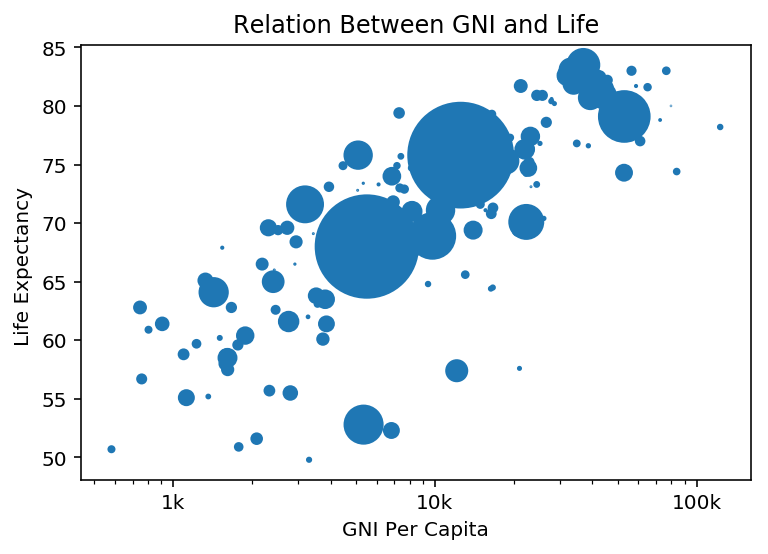

In [32]:
plt.scatter(x=data.gni, y=data.life, s=data.population/1e6*2)
plt.xscale('log')
plt.xlabel('GNI Per Capita')
plt.ylabel('Life Expectancy ')
plt.title('Relation Between GNI and Life')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.savefig('Life_GNI_Scatter_Size.png')
plt.show()


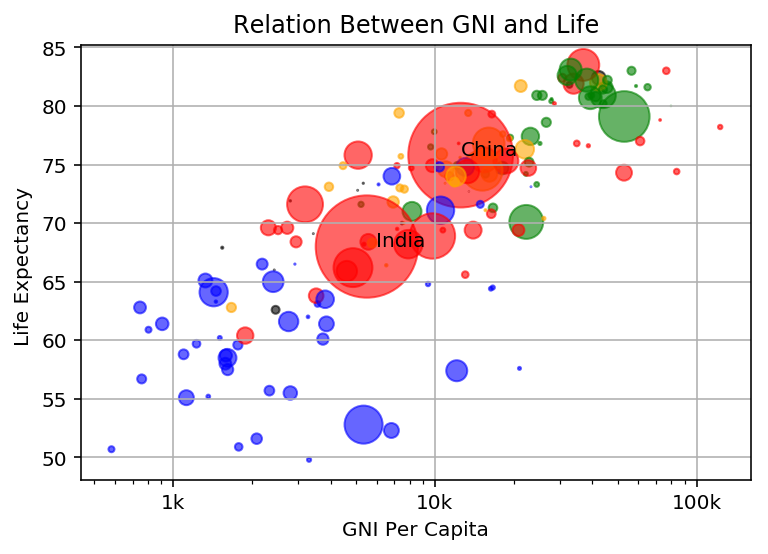

In [33]:
map_dict = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'orange',
    'Oceania':'black'
}
colors = data.continent.map(map_dict) 
plt.scatter(x=data.gni, y=data.life, s=data.population/1e6*2, c=colors, alpha=0.6)
plt.xscale('log')
plt.xlabel('GNI Per Capita')
plt.ylabel('Life Expectancy ')
plt.title('Relation Between GNI and Life')
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.grid(True)
plt.text(12547, 75.8, 'China') 
plt.text(5947, 68, 'India')
plt.savefig('Life_GNI_Scatter_Color.png')
plt.show()

In [63]:
df = pd.read_csv('./human-development/Human Development Index (HDI)_new.csv')

In [64]:
df.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1990,NaN,0.645,0.577,NaN,NaN,NaN,0.704,0.631,0.866,...,0.775,0.860,0.692,NaN,NaN,0.634,0.475,0.399,0.401,0.491
1,1991,NaN,0.626,0.581,NaN,NaN,NaN,0.713,0.628,0.867,...,0.788,0.861,0.697,NaN,NaN,0.644,0.484,0.403,0.402,0.494
2,1992,NaN,0.610,0.587,NaN,NaN,NaN,0.720,0.580,0.868,...,0.801,0.867,0.700,NaN,NaN,0.651,0.496,0.405,0.403,0.481
3,1993,NaN,0.613,0.591,NaN,NaN,NaN,0.725,0.588,0.872,...,0.814,0.871,0.703,NaN,NaN,0.653,0.506,0.408,0.409,0.476
4,1994,NaN,0.619,0.595,NaN,NaN,NaN,0.728,0.599,0.875,...,0.827,0.875,0.709,NaN,NaN,0.654,0.517,0.409,0.408,0.473


In [65]:
years = df.Year

In [66]:
lines = []
for i in range (1,len(df.columns)):
    trace = go.Scatter(
        x = years,
        y = df.ix[:,i],
        name = df.columns[i],
        line = dict(
            
            color = ('rgb('+str(205*df.ix[23,i])+', 0, 200)'),
            width = 1)
    )
    lines.append(trace)
layout = dict(title = 'HDI Of Different Countries',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'HDI'),
              )

fig = dict(data=lines, layout=layout)
plotly.offline.plot(fig, filename='HDI_Multilines.html')
py.iplot(fig, filename='styled-line')

/Users/jasonchan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [68]:
df = pd.read_csv('./human-development/export.csv')

data = [go.Choropleth(
    locationmode = 'country names',
    locations = df['country'],
    z = df['hdi'],
    text = df['country'],
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.35, "rgb(40, 60, 190)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = 'HDI'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2015 Global HDI'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    ),
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-world-map')